In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
print(np.__version__, tf.__version__)

In [5]:
a = [1, 2, 3, 4]
print(type(a))

In [6]:
arr = np.asarray(a)
print(arr, type(arr), arr.shape)

<class 'list'>


In [12]:
arr = np.asarray([[1, 2, 3, 4], [2, 4, 6, 8]])

In [13]:
print(arr, type(arr), arr.shape)

[[1 2 3 4]
 [2 4 6 8]] <class 'numpy.ndarray'> (2, 4)


In [17]:
a = np.zeros((4, 4, 2))

In [18]:
print(a.shape)

(4, 4, 2)


In [19]:
a = np.asarray(range(1, 100))

In [20]:
a

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

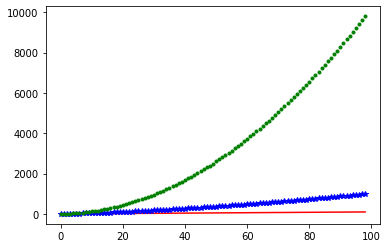

In [25]:
plt.figure(0)
plt.plot(a, 'r')
plt.plot(a**1.5, 'b*')
plt.plot(a**2, 'g.')
plt.show()

(10000, 2)


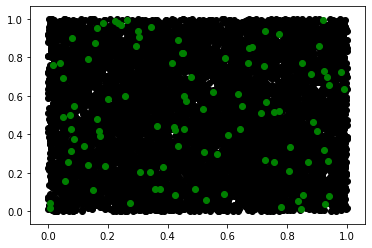

In [27]:
arr = np.random.random((10000, 2))
arr1 = np.random.random((100, 2))
print(arr.shape)
plt.figure(0)
plt.scatter(arr[:, 0], arr[:, 1], color='black')
plt.scatter(arr1[:, 0], arr1[:, 1], color='green')
plt.show()

In [29]:
mean_01 = np.array([3.0, 4.0])
mean_02 = np.array([0.0, -1.0])

cov_01 = np.array([[1.0, 0.0], [0.0, 1.0]])
cov_02 = np.array([[0.75, 0.4], [0.4, 0.6]])

dist_01 = np.random.multivariate_normal(mean_01, cov_01, 200)
dist_02 = np.random.multivariate_normal(mean_02, cov_02, 200)

print(dist_01.shape, dist_02.shape)

(200, 2) (200, 2)


In [30]:
print(type(dist_01))

<class 'numpy.ndarray'>


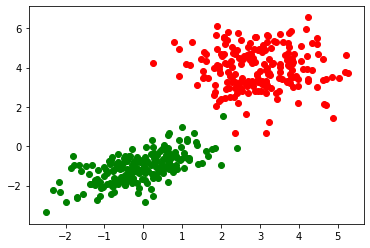

In [31]:
plt.figure(0)
plt.scatter(dist_01[:, 0], dist_01[:, 1], color='red')
plt.scatter(dist_02[:, 0], dist_02[:, 1], color='green')
plt.show()

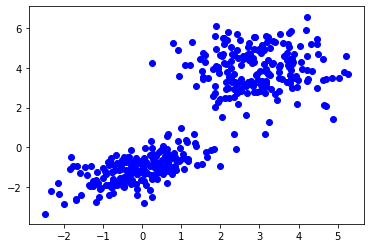

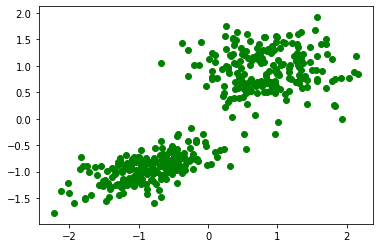

In [33]:
labels = np.zeros((400, ))
labels[200:] = 1.0
#make an array of 400, 2 size
X_data = np.zeros((400, 2))
X_data[ :200, :] = dist_01
X_data[200:, :] = dist_02
plt.figure(0)
plt.scatter(X_data[:, 0], X_data[:, 1], color='blue')

#normalize the data
X_std = (X_data - X_data.mean(axis=0))/X_data.std(axis=0)

plt.figure(1)
plt.scatter(X_std[:, 0], X_std[:, 1], color='green')
plt.show()

In [82]:
class KNN:
    def __init__(self, X=None, y=None):
        self.X = X
        self.y = y
    
    def fit(self, X, y):
        self.X = X
        self.y = y
    
    def distance(self, x1, x2):
        return np.sqrt(((x1-x2)**2).sum())
        
    def predict(self, x, k=5):
        vals = []
        for ix in range(self.X.shape[0]):
            dist = self.distance(x, self.X[ix, :])
            v = [dist, self.y[ix]]
            vals.append(v)
        updated_vals = sorted(vals, key = lambda x:x[0])
        pred_arr = np.asarray(updated_vals[:k])
        #print(pred_arr)
        #np.unique(array, return_counts) 
        #returns 2 arrays 1st with the unique classes, 
        #array with count of each class
        pred_arr = np.unique(pred_arr[:, 1], return_counts=True)
        pred_ind = pred_arr[1].argmax()
        #argmax() -> returns the index, say index returned = pred_ind
        #to return the predicted class,
        #return the ith element from the first array returned by unique
        #i.e. return pred_arr[0][pred_ind]
        #in this code i am returning the class, as well as 
        #number of occurences of that class
        return pred_arr
        

In [83]:
knn = KNN()
knn.fit(X_std, labels)

In [84]:
#assumes that numbers are in accordance to X_std, otherwise normalize them
#using X_data.mean and X_data.std first
q = np.array([1.10, 1.0])
res = knn.predict(q, 5)
print(res)
q = np.array([-1.10, -1.0])
res = knn.predict(q, 7)
print(res)

(array([0.]), array([5]))
(array([1.]), array([7]))
